<h1 style='font-size:40px'> Training Models</h1>

<h2 style='font-size:30px;'> Ajuste de modelos</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Neste capítulo, aprenderemos a ajustar os parâmetros de modelos, a começar pela Regressão Linear.
        </li>
        <li> 
            Com relação a ela, podemos tuná-la com o uso de uma equação que, prontamente, retorna os parâmetros que minimizam a função de custo. Ou, somos capazes também de usar uma abordagem conhecida como Gradient Descent, que iterativamente, modifica esses argumentos até que a função-custo seja a menor possível.
        </li>
    </ul>
</div>

<h2 style='font-size:30px;'> Linear Regression</h2>
<center>
    <h1> Forma Vetorizada</h1>
    <img src='linreg2.png'>
</center>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Lembrando que uma das métricas mais utilizadas é a soma dos erros elevados ao quadrado do modelo (MSE).
        </li>
    </ul>
</div>
<center> 
    <h1> Fórmula Vetorizada do MSE</h1>
    <img src='mse.png'>
</center>

<h2 style='font-size:30px'> The Normal Equation</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A Normal Equation é aquela responsável por definir os coeficientes da Regressão Linear.
        </li>
    </ul>
</div>
<center> 
    <h1> Fórmula da Normal Equation</h1>
    <img src='normalequation.png'>
</center>

<h2 style='font-size:30px'> Gradient Descent</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como dito no início, o Gradient Descent, ajusta, iterativamente, os coeficientes da regressão até que a função de custo (por exemplo, o MSE) chegue a um valor mínimo.
        </li>
        <li>
            Os coeficientes recebem valores aleatórios de início, e eles são melhorados de acordo com uma learning rate definida. No entanto, dar um valor muito alto a ela pode fazer o modelo adquirir coeficientes inadequados.
        </li>
        <li> 
            Ademais, o autor recomenda que nós coloquemos todas as features dentro de uma mesma escala. Essa prática faz com que menos iterações sejam necessárias para que o valor mínimo da função-custo seja alcançado.
        </li>
    </ul>
</div>
<center> 
    <h1> O impacto de diferentes Learning Rates em uma Regressão</h1>
    <img src='learning_rate1.png'>
</center>

<h3 style='font-size:30px;font-style:italic'> Batch Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Bastante eficiente em treinamentos de datasets com muitas features. No entanto, perde eficiência conforme o número de instâncias aumenta!
        </li>
        <li> 
            Sua learning rate adequada pode ser descoberta com o GridSearch. 
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Stochastic Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Treinamento mais veloz em datasets grandes, mas peca em encontrar o valor-ótimo dos coeficientes.
        </li>
        <li> 
            Uma maneira que minimiza esse problema é o ajuste da learning rate periodicamente durante as iterações.
        </li>
    </ul>
</div>

In [49]:
# Fazendo uma regressão com o SGDRegressor.
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
dataset = make_regression(n_samples=100, n_features=1, random_state=42)
X = dataset[0]
y = dataset[1]

# O regressor fará 1000 (max_iter) iterações para descobrir os coeficientes adequados.
# A learning rate inicial (eta0) é 1%.
# A função de custo deve ter uma perda de menor do que 1e-3 (tol) por 5 iterações (n_iter_no_change) para que o processo de treinamento
# termine antes.
sgd_reg=SGDRegressor(max_iter=1000, n_iter_no_change=5,tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)

# Inclinação da curva e ponto de interceptação.
print(sgd_reg.coef_, sgd_reg.intercept_)

[41.74109964] [-3.33178376e-07]


<h3 style='font-size:30px;font-style:italic'> Mini-batch Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Este algoritmo de treinamento tem uma estratégia considerada como um meio-termo em comparação com o Batch Gradient Descent e o Stochastic Gradient Descent.
        </li>
    </ul>
</div>

<center> 
    <h1> Tabela-resumo dos algoritmos de regressão</h1>
    <img src='gradient_table.png'>
</center>

<h2 style='font-size:30px'> Polynomial Regression</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Na maior parte das vezes, uma simples reta não poderá nos fornecer uma boa previsão. Por exemplo, digamos que tivéssemos que fazer uma regressão com dados cuja distribuição espacial se aproxima com a de uma função quadrática.
        </li>
    </ul>
</div>

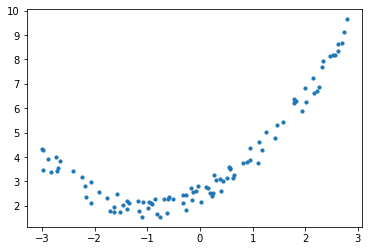

In [60]:
samples = 100
X = 6*np.random.rand(samples, 1)-3

# Os valores-alvo serão a aplicação de 'X' como argumento de uma função quadrática.
y = 0.5 * (X**2) + X + 2 + np.random.rand(samples,1)

# Como uma linha reta pode nos fornecer um baixo RMSE com esses dados?
plt.scatter(X,y, s=10)

<div> 
    <ul style='font-size:20px'> 
        <li>
            Neste contexto, o scikit-learn tem a classe PolynomialFeatures, que retorna  os dados originais mais cada um dos resultados de sua soma elevada a n (sem os coeficientes).
        </li>
        <li> 
            Por exemplo, com um dataset de duas features (a,b), ao usarmos PolynomialFeatures com degree=2, o valor retornado será, além de a e b, $a^2, ab, b^2 $
        </li>
        <li> 
            Tendo o array inicial n features, o output final da transformação, em função de degree (d), possuirá  $ \frac{(n+d)!}{d!n!}!$ colunas.
        </li>
    </ul>
</div>

In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Esta versão extendida de 'X' contém agora 2 features: a original e o seu quadrado.
X_poly[0]

array([-1.57494397,  2.4804485 ])

In [69]:
# Aplicando um modelo de Regressão Linear.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Pronto! Temos todos os coeficientes de uma função quadrática (axˆ2 + bx +c).
lin_reg.coef_, lin_reg.intercept_

(array([[1.00515912, 0.50602725]]), array([2.51520238]))

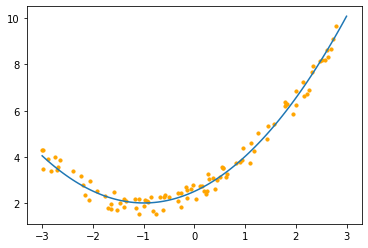

In [87]:
# A hipérbole gerada se adequa muito bem aos dados.
xs = np.linspace(-3,3,101)
xs_poly = poly_features.transform(xs.reshape(-1,1))
ys = lin_reg.predict(xs_poly)
plt.plot(xs, ys)
plt.scatter(X,y, color='orange', s=10)

<h2 style='font-size:30px'> Learning Curves</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Para estudarmos a qualidade do modelo conforme aumentamos o número de instâncias de treino, existem as learning curves. No scikit-learn, uma validação cruzada gradativa ocorrerá. Para cada fold feito, o modelo será treinado em fatias cada vez maiores do conjunto de treino e testado neste e nos dados de validação.
        </li>
    </ul>
</div>

In [134]:
from sklearn.model_selection import learning_curve
# O objeto 'learning_curve' retornará o tamanho da fatia do conjunto de treino e as pontuações de treino e validação.
# Nota: estamos usando a variável independente sem a transformação polinomial!
train_sizes, train_scores, test_scores= learning_curve(lin_reg, X, y, 
                                                       train_sizes=np.linspace(0.01,1,100), random_state=42,
                                                       cv=5, scoring='neg_mean_squared_error')

# Como queremos ter apenas uma visão geral da performance, extrairemos a média das pontuações dos folds com cada tamanho de fatia
# de treino.
train_scores = np.sqrt(-train_scores).mean(axis=1)
test_scores = np.sqrt(-test_scores).mean(axis=1)

/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:1471: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 80 instead of 100).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


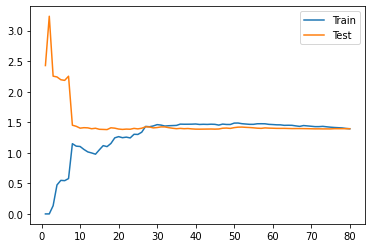

In [135]:
# Plotando as curvas de aprendizado.
plt.plot(train_sizes, train_scores, label='Train')
plt.plot(train_sizes,test_scores, label='Test')
plt.legend()

<p style='color:red'> apagar depois (célula abaixo)

<div> 
    <ul style='font-size:20px'> 
        <li>
            Com poucas instâncias de treino, o modelo tem um baixo índice de erro entre elas, mas um alto valor para o conjunto de teste. Conforme os dados disponíveis crescem,a taxa de erro no treinamento tende a crescer, enquanto que na validação cai. Em certo ponto, ambas as curvas atingem um plateau, em que não conseguem atingir índices melhores ou piores.
        </li>
    </ul>
</div>

In [148]:
from sklearn.model_selection import learning_curve

# Fazendo o mesmo procedimento com 'X_poly'.
train_sizes_poly, train_scores_poly, test_scores_poly= learning_curve(lin_reg, X_poly, y, 
                                                       train_sizes=np.linspace(0.01,1,100), random_state=42,
                                                       cv=5, scoring='neg_mean_squared_error')

train_scores_poly = np.sqrt(-train_scores_poly).mean(axis=1)
test_scores_poly = np.sqrt(-test_scores_poly).mean(axis=1)

/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:1471: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 80 instead of 100).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


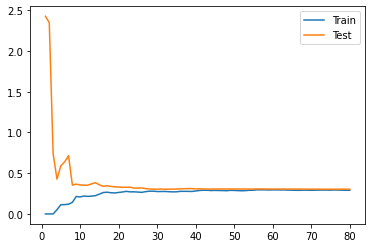

In [149]:
# Veja, o plateau é atingido com uma taxa de erro muito menor!
plt.plot(train_sizes_poly, train_scores_poly, label='Train')
plt.plot(train_sizes_poly,test_scores_poly, label='Test')
plt.legend()

<h2 style='font-size:30px'>  Regularized Linear Models</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
          Os modelos lineares regularizados são versões adapatadas do LinearRegression. O seu intuito é restringir os valores dos coeficientes, evitando assim o vício do algoritmo.
        </li>
        <li> 
          É importante frisar que modelos regularizados costumam exigir que os dados com os quais lidarão estejam normalizados!
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Ridge Regression</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            A regressão Ridge reduz os coeficientes da fórmula. Quanto maior o argumento $\alpha$, mais regularizada ela estará e, assim, mais próximos de 0 esses números estarão.
        </li>
    </ul>
</div>

<p style='color:red'> Seção grifad</p>

In [50]:
! mv  /Users/felipeveiga/Desktop/Screen\ Shot\ 2022-05-14\ at\ 16.24.04.png ./gradient_table.png